# **Import important Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# **To display columns**

In [ ]:
pd.set_option("display.max_columns", None)

# **Upload the Data file**
**save file in data**

In [ ]:
data=pd.read_csv('Data.csv')

# **Display the data**

In [ ]:
data

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


# **Checking the shape of data (rows, columns)**

In [ ]:
data.shape

(786363, 30)

# **Checking null values**

In [ ]:
data.isnull().sum()

Unnamed: 0                       0
accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInM

# **Remove unwanted columns**

In [ ]:
data.drop(columns=['echoBuffer','merchantCity','merchantState','merchantZip',"merchantName",'merchantCountryCode'], inplace=True)

In [ ]:
data.drop(columns=['recurringAuthInd','posOnPremises'], inplace=True)

# **Dataset Overview and Structure**



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                786363 non-null  int64  
 1   accountNumber             786363 non-null  int64  
 2   customerId                786363 non-null  int64  
 3   creditLimit               786363 non-null  int64  
 4   availableMoney            786363 non-null  float64
 5   transactionDateTime       786363 non-null  object 
 6   transactionAmount         786363 non-null  float64
 7   acqCountry                781801 non-null  object 
 8   posEntryMode              782309 non-null  float64
 9   posConditionCode          785954 non-null  float64
 10  merchantCategoryCode      786363 non-null  object 
 11  currentExpDate            786363 non-null  object 
 12  accountOpenDate           786363 non-null  object 
 13  dateOfLastAddressChange   786363 non-null  o

# **Splitting transactionDateTime and Assigning to New Columns**

In [ ]:
# Get the number of columns in the output of data['transactionDateTime'].str.split(' ', expand=True)
num_columns = data['transactionDateTime'].str.split(' ', expand=True).shape[1]
# Create a list of column names with the desired number of columns
column_names = ['transaction date'] + ['transaction time'] * (num_columns - 2)

# Assign the output of data['transactionDateTime'].str.split(' ', expand=True) to the new columns
data[column_names] = data['transactionDateTime'].str.split(' ', expand=True)


# **Splitting transaction date into date and time Columns**

In [ ]:
data[['date', 'time']] = data['transaction date'].str.split('T', expand=True)

# **Dataset Overview**

In [ ]:
data

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction date,date,time
0,0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,US,2.0,1.0,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False,2016-08-13T14:27:32,2016-08-13,14:27:32
1,1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,US,9.0,1.0,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False,2016-10-11T05:05:54,2016-10-11,05:05:54
2,2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,2016-11-08T09:18:39,2016-11-08,09:18:39
3,3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,2016-12-10T02:14:50,2016-12-10,02:14:50
4,4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,US,2.0,1.0,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False,2016-03-24T21:04:46,2016-03-24,21:04:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,US,90.0,1.0,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False,2016-12-22T18:44:12,2016-12-22,18:44:12
786359,786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,US,9.0,1.0,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False,2016-12-25T16:20:34,2016-12-25,16:20:34
786360,786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,US,2.0,1.0,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False,2016-12-27T15:46:24,2016-12-27,15:46:24
786361,786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,US,9.0,99.0,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False,2016-12-29T00:30:55,2016-12-29,00:30:55


# **Removing the 'transaction date' Column from the DataFrame**

In [ ]:
data.drop('transaction date', axis=1,inplace = True)

# **Renaming Columns 'date' to 'Transactiondate' and 'time' to 'Transactiontime'**

In [ ]:
data.rename(columns = {'date':'Transactiondate'}, inplace = True)

In [ ]:
data.rename(columns = {"time":'Transactiontime'}, inplace = True)

# **Removing the 'transactionDateTime' Column from the DataFrame**

In [ ]:
data.drop('transactionDateTime', axis=1,inplace = True)

# **Converting 'accountOpenDate', 'dateOfLastAddressChange', and 'currentExpDate' to Datetime Format**

In [ ]:
data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'])

In [ ]:
data['dateOfLastAddressChange'] = pd.to_datetime(data['dateOfLastAddressChange'])

In [ ]:
data['currentExpDate'] = pd.to_datetime(data['currentExpDate'])

# **Counting Missing Values in Each Column**

In [ ]:
data.isnull().sum()

Unnamed: 0                     0
accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionAmount              0
acqCountry                  4562
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
Transactiondate                0
Transactiontime                0
dtype: int64

# **Filling Missing Values in 'posConditionCode' and 'posEntryMode' with Mean Values**

In [ ]:
data['posConditionCode']= data['posConditionCode'].fillna(data['posConditionCode'].mean())
data['posEntryMode']= data['posEntryMode'].fillna(data['posEntryMode'].mean())

# **Filling Missing Values in 'acqCountry' and 'transactionType' with Mode Values**

In [ ]:
data['acqCountry'] = data['acqCountry'].fillna(data['acqCountry'].mode()[0])
data['transactionType']= data['transactionType'].fillna(data['transactionType'].mode()[0])

# **Verifying Data After Filling Missing Values**

In [ ]:
data.isnull().sum()

Unnamed: 0                  0
accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionAmount           0
acqCountry                  0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
Transactiondate             0
Transactiontime             0
dtype: int64

# **Removing "Unnamed: 0" Column from DataFrame**

In [ ]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

# **Converting Date Columns to Datetime Format**

In [ ]:
data['dateOfLastAddressChange'] = pd.to_datetime(data['dateOfLastAddressChange'])
data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'])
data['currentExpDate'] = pd.to_datetime(data['currentExpDate'])

# **Dataset Overview**

In [ ]:
data

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Transactiondate,Transactiontime
0,737265056,737265056,5000,5000.00,98.55,US,2.0,1.0,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False,2016-08-13,14:27:32
1,737265056,737265056,5000,5000.00,74.51,US,9.0,1.0,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False,2016-10-11,05:05:54
2,737265056,737265056,5000,5000.00,7.47,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,2016-11-08,09:18:39
3,737265056,737265056,5000,5000.00,7.47,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,2016-12-10,02:14:50
4,830329091,830329091,5000,5000.00,71.18,US,2.0,1.0,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False,2016-03-24,21:04:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,119.92,US,90.0,1.0,rideshare,2022-12-01,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False,2016-12-22,18:44:12
786359,732852505,732852505,50000,48785.04,18.89,US,9.0,1.0,online_subscriptions,2023-08-01,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False,2016-12-25,16:20:34
786360,732852505,732852505,50000,48766.15,49.43,US,2.0,1.0,rideshare,2025-08-01,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False,2016-12-27,15:46:24
786361,732852505,732852505,50000,48716.72,49.89,US,9.0,99.0,online_retail,2022-07-01,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False,2016-12-29,00:30:55


# **Dataset Overview and Structure**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int64         
 1   customerId                786363 non-null  int64         
 2   creditLimit               786363 non-null  int64         
 3   availableMoney            786363 non-null  float64       
 4   transactionAmount         786363 non-null  float64       
 5   acqCountry                786363 non-null  object        
 6   posEntryMode              786363 non-null  float64       
 7   posConditionCode          786363 non-null  float64       
 8   merchantCategoryCode      786363 non-null  object        
 9   currentExpDate            786363 non-null  datetime64[ns]
 10  accountOpenDate           786363 non-null  datetime64[ns]
 11  dateOfLastAddressChange   786363 non-null  datetime64[ns]
 12  ca

# **Unique Values in 'acqCountry' Column**

In [ ]:
data.acqCountry.unique()

array(['US', 'CAN', 'MEX', 'PR'], dtype=object)

# **Unique Values in 'merchantCategoryCode' Column**

In [ ]:
data.merchantCategoryCode.unique()

array(['rideshare', 'entertainment', 'mobileapps', 'fastfood',
       'food_delivery', 'auto', 'online_retail', 'gym', 'health',
       'personal care', 'food', 'fuel', 'online_subscriptions',
       'online_gifts', 'hotels', 'airline', 'furniture', 'subscriptions',
       'cable/phone'], dtype=object)

# **Unique Values in 'transactionType' Column**

In [ ]:
data.transactionType.unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL'], dtype=object)

# **Unique Values in 'cardPresent' Column**

In [ ]:
data.cardPresent.unique()

array([False,  True])

# **Data Inspection and Overview**

In [ ]:
data

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Transactiondate,Transactiontime
0,737265056,737265056,5000,5000.00,98.55,US,2.0,1.0,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False,2016-08-13,14:27:32
1,737265056,737265056,5000,5000.00,74.51,US,9.0,1.0,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False,2016-10-11,05:05:54
2,737265056,737265056,5000,5000.00,7.47,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,2016-11-08,09:18:39
3,737265056,737265056,5000,5000.00,7.47,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False,2016-12-10,02:14:50
4,830329091,830329091,5000,5000.00,71.18,US,2.0,1.0,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False,2016-03-24,21:04:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,119.92,US,90.0,1.0,rideshare,2022-12-01,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False,2016-12-22,18:44:12
786359,732852505,732852505,50000,48785.04,18.89,US,9.0,1.0,online_subscriptions,2023-08-01,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False,2016-12-25,16:20:34
786360,732852505,732852505,50000,48766.15,49.43,US,2.0,1.0,rideshare,2025-08-01,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False,2016-12-27,15:46:24
786361,732852505,732852505,50000,48716.72,49.89,US,9.0,99.0,online_retail,2022-07-01,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False,2016-12-29,00:30:55


# **Applying LabelEncoder for Categorical Variable Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'transactionType' column
data['transactionTypeEncoded'] = label_encoder.fit_transform(data['transactionType'])

In [ ]:
data['merchantCategoryCode'] = label_encoder.fit_transform(data['merchantCategoryCode'])

In [ ]:
data['transactionType'] = label_encoder.fit_transform(data['transactionType'])

In [ ]:
data['cardPresent'] = label_encoder.fit_transform(data['cardPresent'])

In [ ]:
data['expirationDateKeyInMatch'] = label_encoder.fit_transform(data['expirationDateKeyInMatch'])

In [ ]:
data['isFraud'] = label_encoder.fit_transform(data['isFraud'])

In [ ]:
data['acqCountry'] = label_encoder.fit_transform(data['acqCountry'])

In [ ]:
data['Transactiondate'] = label_encoder.fit_transform(data['Transactiondate'])

In [ ]:
data['Transactiontime'] = label_encoder.fit_transform(data['Transactiontime'])

In [ ]:
data['Transactiondate'] = label_encoder.fit_transform(data['Transactiondate'])

In [ ]:
data['currentExpDate'] = label_encoder.fit_transform(data['currentExpDate'])

In [ ]:
data['accountOpenDate'] = label_encoder.fit_transform(data['accountOpenDate'])

In [ ]:
data['dateOfLastAddressChange'] = label_encoder.fit_transform(data['dateOfLastAddressChange'])

# **Validation of Converted Numerical Data Values**

In [ ]:
data

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Transactiondate,Transactiontime,transactionTypeEncoded
0,737265056,737265056,5000,5000.00,98.55,3,2.0,1.0,17,42,1529,1529,414,414,1803,1,0.00,0,0,0,225,52043,1
1,737265056,737265056,5000,5000.00,74.51,3,9.0,1.0,3,50,1529,1529,486,486,767,1,0.00,1,0,0,284,18352,1
2,737265056,737265056,5000,5000.00,7.47,3,9.0,1.0,12,68,1529,1529,486,486,767,1,0.00,0,0,0,312,33513,1
3,737265056,737265056,5000,5000.00,7.47,3,9.0,1.0,12,68,1529,1529,486,486,767,1,0.00,0,0,0,344,8090,1
4,830329091,830329091,5000,5000.00,71.18,3,2.0,1.0,4,118,1673,1673,885,885,3143,1,0.00,1,0,0,83,75877,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,119.92,3,90.0,1.0,17,36,702,701,936,936,3783,1,1095.04,0,0,0,356,67443,1
786359,732852505,732852505,50000,48785.04,18.89,3,9.0,1.0,15,44,702,701,939,939,3388,1,1214.96,0,0,0,359,58825,1
786360,732852505,732852505,50000,48766.15,49.43,3,2.0,1.0,17,68,702,701,936,936,3783,1,1233.85,0,0,0,361,56775,1
786361,732852505,732852505,50000,48716.72,49.89,3,9.0,99.0,14,31,702,701,939,939,3388,1,1283.28,0,0,0,363,1855,1


# **Exploratory Data Visualization with Seaborn and Matplotlib**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# **Correlation Matrix of Dataset**

In [ ]:
data.corr()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,acqCountry,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Transactiondate,Transactiontime,transactionTypeEncoded
accountNumber,1.000000,1.000000,0.140673,0.066345,-0.001364,0.002847,-0.001012,-0.000774,0.048013,-0.000714,-0.020147,-0.028259,-0.011432,-0.011376,0.038517,0.001310,0.162248,0.006099,-0.001057,-0.004011,-0.000261,0.000819,0.001310
customerId,1.000000,1.000000,0.140673,0.066345,-0.001364,0.002847,-0.001012,-0.000774,0.048013,-0.000714,-0.020147,-0.028259,-0.011432,-0.011376,0.038517,0.001310,0.162248,0.006099,-0.001057,-0.004011,-0.000261,0.000819,0.001310
creditLimit,0.140673,0.140673,1.000000,0.834977,0.005581,0.000999,-0.000740,0.000231,0.045093,0.001370,0.058569,0.065000,0.051006,0.051088,0.125611,0.001428,0.653652,-0.003929,0.002391,0.003108,-0.001290,-0.001563,0.001428
availableMoney,0.066345,0.066345,0.834977,1.000000,-0.010070,0.000839,-0.000360,0.000906,0.017699,0.001797,0.012296,-0.059051,0.016253,0.016323,0.073879,-0.000175,0.129332,0.002508,0.004067,-0.001538,-0.041982,-0.003260,-0.000175
transactionAmount,-0.001364,-0.001364,0.005581,-0.010070,1.000000,-0.000341,0.003095,-0.000817,-0.005222,-0.000049,0.003283,0.026725,-0.000233,-0.000141,-0.001513,0.106377,0.023905,0.037361,0.001751,0.075651,-0.029210,0.001326,0.106377
acqCountry,0.002847,0.002847,0.000999,0.000839,-0.000341,1.000000,0.001733,-0.000194,-0.001639,0.003598,-0.002185,-0.002304,0.001877,0.001874,0.001859,-0.001803,0.000646,0.003515,0.001476,-0.003934,-0.000645,0.001100,-0.001803
posEntryMode,-0.001012,-0.001012,-0.000740,-0.000360,0.003095,0.001733,1.000000,-0.000696,0.000348,-0.001678,0.000946,0.000486,-0.002279,-0.002378,-0.001187,-0.001926,-0.000838,-0.001090,0.001617,0.007801,0.000716,-0.001128,-0.001926
posConditionCode,-0.000774,-0.000774,0.000231,0.000906,-0.000817,-0.000194,-0.000696,1.000000,-0.001784,0.000099,0.001245,-0.000907,-0.000153,-0.000176,0.001620,-0.000311,-0.000830,0.001774,-0.000803,0.008148,-0.000478,-0.000689,-0.000311
merchantCategoryCode,0.048013,0.048013,0.045093,0.017699,-0.005222,-0.001639,0.000348,-0.001784,1.000000,-0.000572,-0.020356,0.007704,0.036315,0.036207,-0.020992,-0.001754,0.056915,-0.696714,-0.028711,0.027756,0.000034,-0.000398,-0.001754
currentExpDate,-0.000714,-0.000714,0.001370,0.001797,-0.000049,0.003598,-0.001678,0.000099,-0.000572,1.000000,0.002553,0.001241,-0.001339,-0.001326,-0.003305,0.001823,-0.000003,-0.000186,0.000839,0.001258,0.001679,-0.001355,0.001823


# **Heatmap of Correlation Matrix**

<Axes: >

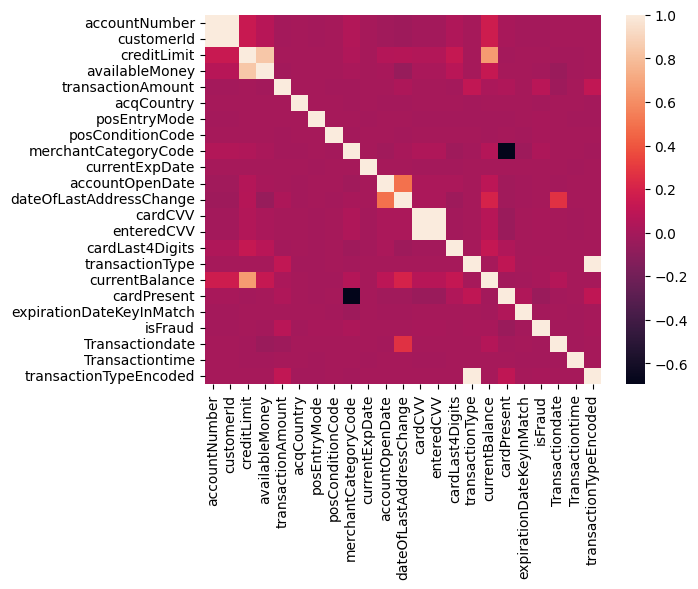

In [ ]:
sns.heatmap(data.corr())

# **Listing Dataset Columns**

In [ ]:
data.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionAmount', 'acqCountry', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'Transactiondate',
       'Transactiontime', 'transactionTypeEncoded'],
      dtype='object')

# **Feature Selection for Modeling: 'x' and 'y' Variables**

In [ ]:
x = data[['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionAmount', 'acqCountry', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch','Transactiondate',
       'Transactiontime', 'transactionTypeEncoded']]
y = data[['isFraud',]]

# **Splitting Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

# **Creating Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

# **Training Logistic Regression Model**

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

# **Transforming DateTime to Numerical Features and Training Logistic Regression Model**

In [ ]:
# Convert datetime columns to numerical features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'Transactiondate' and 'Transactiontime' are datetime columns
for col in ['Transactiondate', 'Transactiontime']:
    x_train[col] = pd.to_numeric(x_train[col].astype('int64'))  # Convert to Unix timestamp (nanoseconds)
    x_test[col] = pd.to_numeric(x_test[col].astype('int64'))  # Apply same transformation to test data

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#**Evaluating Test Data Accuracy of Logistic Regression Model**

In [ ]:
x_test_predict= model.predict(x_test)
test_data_accuracy =accuracy_score(x_test_predict, y_test)

# **Training Accuracy Score**

In [ ]:
 test_data_accuracy

0.9845237262594342

# **Training Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

# **Training and Evaluating Random Forest Classifier**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    154780
           1       0.83      0.02      0.04      2493

    accuracy                           0.98    157273
   macro avg       0.91      0.51      0.52    157273
weighted avg       0.98      0.98      0.98    157273


Confusion Matrix:
[[154770     10]
 [  2444     49]]


# **Training and Evaluating Decision Tree Classifier**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    154780
           1       0.07      0.09      0.08      2493

    accuracy                           0.97    157273
   macro avg       0.53      0.54      0.53    157273
weighted avg       0.97      0.97      0.97    157273


Confusion Matrix:
[[151971   2809]
 [  2266    227]]


# **Support Vector Classifier (SVC) Training and Evaluation**

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# **Training and Evaluating Support Vector Classifier (SVC)**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9844346760827268
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    232237
           1       0.00      0.00      0.00      3672

    accuracy                           0.98    235909
   macro avg       0.49      0.50      0.50    235909
weighted avg       0.97      0.98      0.98    235909



# **Training and Evaluating K-Nearest Neighbors (KNN) Classifier**

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9840023059739137
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    232237
           1       0.12      0.00      0.01      3672

    accuracy                           0.98    235909
   macro avg       0.55      0.50      0.50    235909
weighted avg       0.97      0.98      0.98    235909



# **Receiver Operating Characteristic (ROC) Curve**

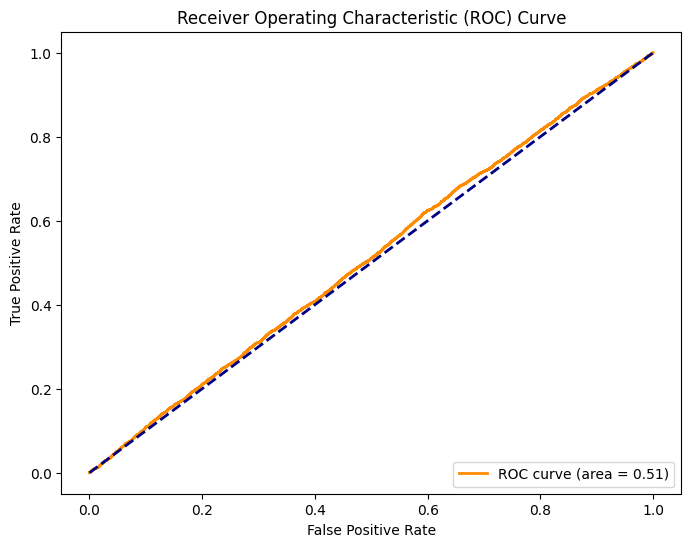

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **Precision-Recall Curve**

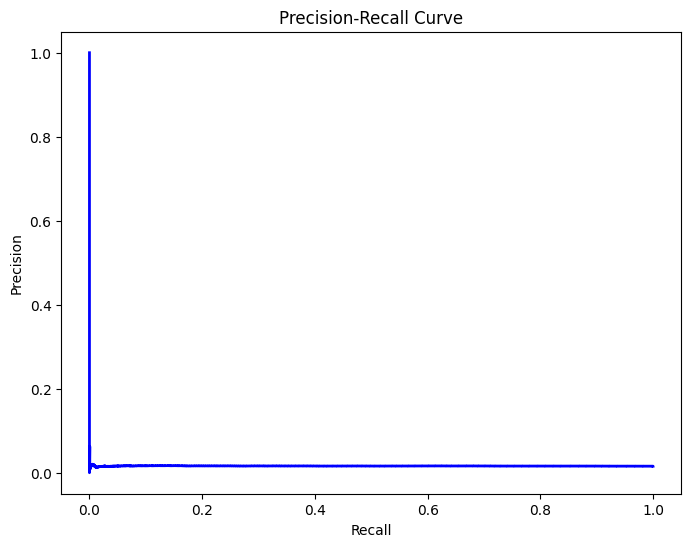

In [ ]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(x_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# **Model Accuracy Comparison**

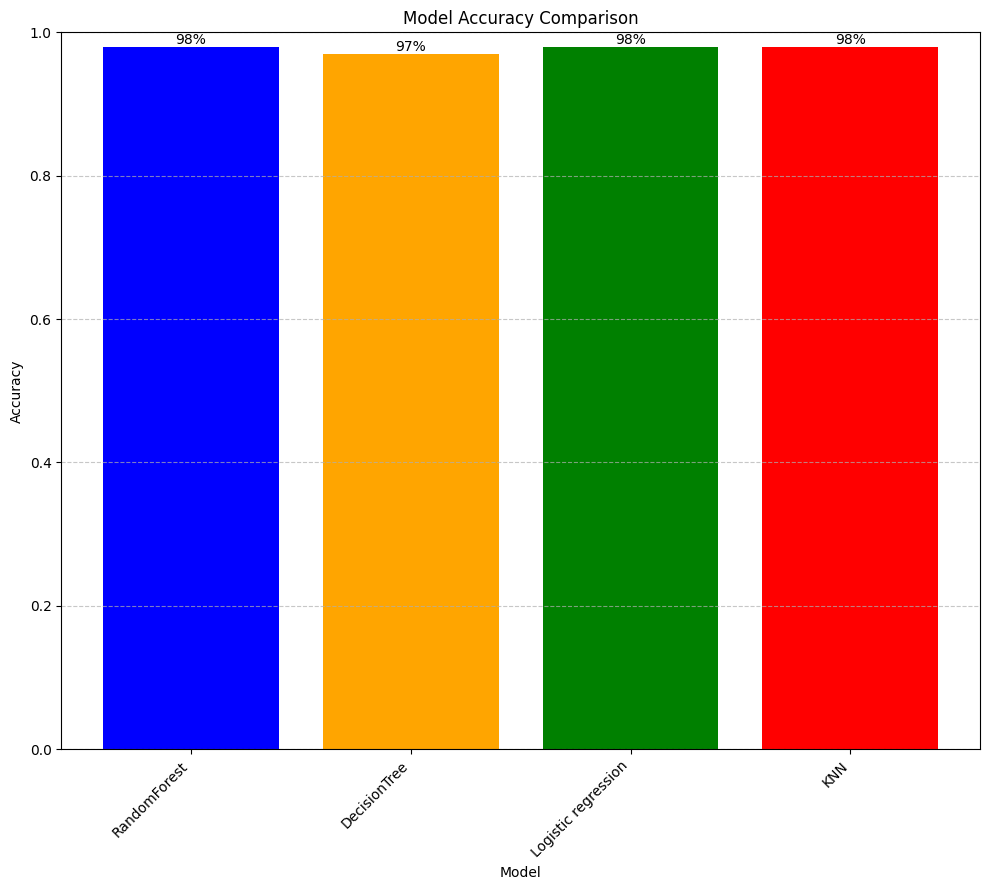

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample accuracy data
accuracy_data = {
    'Model': ['RandomForest', 'DecisionTree', 'Logistic regression', 'KNN'],
    'Accuracy': [0.98, 0.97 , 0.98,  0.98]  # Sample accuracy scores
}

# Create DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

# Define colors for each bar
colors = ['blue', 'orange', 'green', 'red',]

# Plotting
plt.figure(figsize=(10, 9))
bars = plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=colors)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height*100:.0f}%',  # Convert to percentage and format
        ha='center',
        va='bottom'
    )

plt.show()


# **Downloading File from Google Drive**

In [2]:

from google.colab import files
from google.colab import drive

# Mount your Google Drive (if you haven't already)
drive.mount('/content/drive')

# Replace with the actual path to your file in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Copy of FRAUD DETECTION.ipynb'  # Adjust this path
files.download(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>